<a href="https://colab.research.google.com/github/monali0802/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
print(data)

       0      1      2      3      4    ...    96     97     98     99     100
0       74  -7.82   8.79  -9.66  -8.16  ...  99.00  -5.63  99.00  99.00  99.00
1      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
2       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
4       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24978  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24979   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24980   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24982   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24983 rows x 101 columns]


In [30]:
arr = data
print(arr.shape)

(24983, 101)


In [31]:
arr.replace(99.00, np.nan, inplace=True)
print(arr)



         0     1     2     3     4     5    ...   95    96    97    98    99    100
0       74.0 -7.82  8.79 -9.66 -8.16 -7.52  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      100.0  4.08 -0.29  6.36  4.37 -2.38  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       49.0   NaN   NaN   NaN   NaN  9.03  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       48.0   NaN  8.35   NaN   NaN  1.80  ...   NaN   NaN   NaN   NaN   NaN   NaN
4       91.0  8.50  4.61 -4.17 -5.39  1.36  ...  5.73  1.55  3.11  6.55  1.80  1.60
...      ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  100.0  0.44  7.43  9.08  2.33  3.20  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979   91.0  9.13 -8.16  8.59  9.08  0.87  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   39.0   NaN   NaN   NaN   NaN -7.77  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   37.0   NaN   NaN   NaN   NaN -9.71  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982   72.0  2.43  2.67 -3.98  4.27 -2.28  ...   NaN   NaN   NaN   NaN   Na

In [32]:
arr_new = arr.drop(columns=[0], axis=1)
print(arr_new)

        1     2     3     4     5     6    ...   95    96    97    98    99    100
0     -7.82  8.79 -9.66 -8.16 -7.52 -8.50  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      4.08 -0.29  6.36  4.37 -2.38 -9.66  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       NaN   NaN   NaN   NaN  9.03  9.27  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       NaN  8.35   NaN   NaN  1.80  8.16  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      8.50  4.61 -4.17 -5.39  1.36  1.60  ...  5.73  1.55  3.11  6.55  1.80  1.60
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  0.44  7.43  9.08  2.33  3.20  6.75  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979  9.13 -8.16  8.59  9.08  0.87 -8.93  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   NaN   NaN   NaN   NaN -7.77   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   NaN   NaN   NaN   NaN -9.71   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982  2.43  2.67 -3.98  4.27 -2.28  7.33  ...   NaN   NaN   NaN   NaN   NaN   NaN

[24

In [33]:
# ranking = new_arr.rank(axis=1, method='average')
# print(ranking)
mean_result = arr_new.mean(axis=0)

print(mean_result)

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64


In [34]:
print(mean_result.min() )
print("Worst rated joke: ",mean_result.idxmin() )
print(mean_result.max() )
print("Best rated joke: ",mean_result.idxmax() )


-3.8338796373689923
Worst rated joke:  58
3.6650848950824937
Best rated joke:  50


In [35]:
rated = np.where(arr_new!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [36]:
def replace_new(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(orig))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])


In [37]:

new_arr, idx = replace_new(arr_new.values, 0.1)

print(new_arr)
print(idx)
arr_new.values[idx[0][0], idx[1][0]]

new_arr[idx[0][0], idx[1][0]]

[[99.    8.79 -9.66 ...   nan   nan   nan]
 [ 4.08 -0.29  6.36 ...  0.34 -4.32  1.07]
 [  nan   nan   nan ...   nan   nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]
(array([22402, 20398, 15957, ..., 19123,  5266, 17938]), array([54,  5, 62, ..., 16, 48, 17]))


99.0

In [38]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
latent_user_preferences

In [ ]:
latent_item_features

In [39]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating != 99.00:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [40]:
predict_rating(9232,8)

0.12245883794692228

Iteration 0/1:	MSE=26.260116
Iteration 0/1:	MSE=25.291864
Iteration 0/1:	MSE=25.001924
Iteration 0/1:	MSE=24.784732
Iteration 0/1:	MSE=24.574947
Iteration 0/1:	MSE=24.363621
Iteration 0/1:	MSE=24.149815
Iteration 0/1:	MSE=23.934249
Iteration 0/1:	MSE=23.718107
Iteration 0/1:	MSE=23.502703


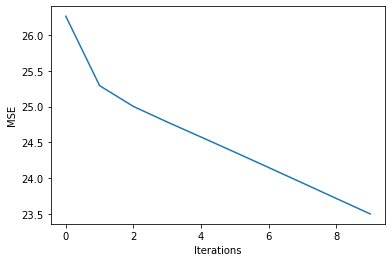

In [ ]:
num_iter = 10
hist = []
for _ in range(num_iter):
  hist.append(sgd(1))  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0 , num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.28666851, 0.77719771, 0.76654728, ..., 1.43300938, 0.56813729,
        1.91319256],
       [0.47086483, 0.27183874, 0.28823143, ..., 0.56356279, 0.19684584,
        0.76438459],
       [1.91068511, 1.15824549, 1.13578957, ..., 2.11518924, 0.8472981 ,
        2.82004194],
       ...,
       [0.90459729, 0.54300554, 0.54101096, ..., 1.01808027, 0.39643472,
        1.36246913],
       [1.41948826, 0.85416744, 0.84767252, ..., 1.59107324, 0.62391835,
        2.12732405],
       [1.79090676, 1.05159811, 1.08544237, ..., 2.08848801, 0.7642399 ,
        2.81704693]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
# print(pd.DataFrame(values))
comparison_data = pd.DataFrame(values)
comparison_data.columns = arr_new.columns

In [ ]:
print(comparison_data)
comparison_data.iloc[21672][36]
# tmp_ddata = comparison_data
# print(tmp_ddata[comparison_data == 21486])

                               1    ...                         100
0       (-7.82, 1.286668509884769)  ...    (nan, 1.913192564113316)
1      (4.08, 0.47086483126287176)  ...  (99.0, 0.7643845948507715)
2         (nan, 1.910685111427222)  ...   (nan, 2.8200419398821848)
3        (nan, 1.1224657221225567)  ...   (nan, 1.9161136304992286)
4         (8.5, 1.719255751330964)  ...   (1.6, 2.7219417721567396)
...                            ...  ...                         ...
24978   (0.44, 1.7576992177844237)  ...  (7.43, 2.8808734725271186)
24979  (9.13, 0.39957184930896433)  ...  (8.45, 0.6333839131128324)
24980    (nan, 0.9045972944528383)  ...    (nan, 1.362469129531298)
24981    (nan, 1.4194882591514144)  ...   (nan, 2.1273240466752035)
24982   (2.43, 1.7909067569661552)  ...    (nan, 2.817046929067889)

[24983 rows x 100 columns]


(3.25, 3.603506316492173)

In [56]:
df_users = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Users')
df_movies = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Items')
print(df_users)
print(df_movies)

    User   Factor1   Factor2   Factor3  ...  Factor12  Factor13  Factor14  Factor15
0   4768 -0.204024  0.161079 -0.090447  ...  0.355404  0.007108 -0.118663 -0.039125
1    156 -0.189652 -0.178979 -0.091490  ... -0.048606  0.045916  0.113671  0.179873
2   5323 -0.115308 -0.090886 -0.053129  ... -0.019460  0.108372  0.054471 -0.109552
3    174 -0.227462 -0.272532 -0.017231  ... -0.082396  0.036767 -0.165438  0.050692
4   4529 -0.014616 -0.102218 -0.107935  ... -0.132836 -0.039897  0.129063  0.102669
5    783 -0.020301 -0.031919 -0.036955  ...  0.059725 -0.021647  0.039873 -0.061857
6   3878 -0.091462  0.215879 -0.180453  ...  0.214467  0.189250  0.065990  0.102776
7    768  0.000819 -0.009229 -0.019228  ... -0.010051 -0.002108  0.043223 -0.006670
8   4469 -0.030528 -0.011537 -0.042822  ...  0.010926  0.024400  0.005318 -0.007983
9   1882 -0.083093 -0.029160  0.013748  ... -0.113364 -0.021325  0.181508  0.022357
10  4997 -0.185443 -0.276496 -0.781275  ...  0.103116 -0.100563  0.100164  0

In [57]:
new_df_movies = df_movies.drop(columns='Title')
new_df_movies.shape


(100, 16)

In [58]:
items.loc[items['Movie ID'] == 2501]['Factor1']

83   -0.83126
Name: Factor1, dtype: float64

In [59]:
# print(max(items['Factor8']))
# items.loc[items['Factor8'] == max(items['Factor8'])]['Movie ID']
print(df_movies.sort_values(by='Factor8',axis=0, ascending=False))

    Movie ID                     Title   Factor1  ...  Factor13  Factor14  Factor15
5         24  Kill Bill: Vol. 1 (2003) -0.645019  ...  0.724543 -0.385681  1.036656
36       393  Kill Bill: Vol. 2 (2004) -0.322067  ...  0.657099 -0.298533  0.888315
47       597            Titanic (1997)  1.567865  ...  0.370387  2.215933  0.456127
2         13       Forrest Gump (1994) -2.240888  ... -0.330276 -2.209004 -0.419092
13       114       Pretty Woman (1990)  1.658681  ...  0.520683  0.662535 -0.162412
..       ...                       ...       ...  ...       ...       ...       ...
18       141       Donnie Darko (2001)  0.056865  ...  0.698186  0.260986  0.472673
8         77            Memento (2000) -1.443730  ... -0.032267  0.513381  0.505265
90      8467      Dumb & Dumber (1994)  2.720287  ... -1.240696  0.279910  1.616338
21       155    The Dark Knight (2008) -2.169359  ...  2.193465  0.720142  0.445634
30       272      Batman Begins (2005) -0.920371  ...  1.793180  0.448899  0

In [60]:
users = pd.DataFrame(df_users)
user_new = users.loc[users['User'] == 2067].values[0][1:]


items = pd.DataFrame(df_movies)
item_new = items.loc[items['Movie ID'] == 857].values[0][2:]


user_new.dot(item_new)

0.3169546564734672

In [61]:
users = pd.DataFrame(df_users)
user_new = users.loc[users['User'] == 768].values[0][1:]


items = pd.DataFrame(df_movies)
item_new = items.loc[items['Movie ID'] == 10020].values[0][2:]


user_new.dot(item_new)

0.06816874145679636

In [75]:
# Which 3 movies would you recommend to User 783?
user_pref = df_users[df_users['User'] == 783].iloc[:, -15:].values
item_feat = df_movies.iloc[:, -15:].values.T
df_movies['pred'] = user_pref.dot(item_feat).T
# print(user_pref.dot(item_feat).shape)
# print(max(user_pref.dot(item_feat)))

print(df_movies.sort_values(by='pred', axis=0, ascending=False)['Movie ID'].values)


[  597    24   393   602   329   114   752   197   155   272   557   671
    98   280   558   601   664   745  1637  2164    13   424  8358   581
 36657   857  2024   672   453   604   278 36955   807   187   274   141
   268 36658  1572   641   180   462  8587    63  9331    38  1894   121
   788    14  9741  1422   680  9802   568   122    77   120   640 10020
   550   146  1900  5503   603   786   105   607   954  3049   243   134
   107   955   275   812   629   238   153   194    22   414    11   854
  8467    85  1892  1891  1597   161    12   862  4327  9806  7443   585
  2502  2501   808   809]


In [76]:
# Which 3 movies would you recommend to User 5323?
user_pref = df_users[df_users['User'] == 5323].iloc[:, -15:].values
item_feat = df_movies.iloc[:, -15:].values.T
df_movies['pred'] = user_pref.dot(item_feat).T
# print(user_pref.dot(item_feat).shape)
# print(max(user_pref.dot(item_feat)))

print(df_movies.sort_values(by='pred', axis=0, ascending=False)['Movie ID'].values)

[  597   602   954   955   604   114  2502   329  2501    98   603   161
   120  1637   122    24   121   393   180   453  8587   857   280   607
    22  2024   664  1572   146   640    12   462  8358 36955   745 10020
   197   601   155  4327  5503  9331   568   862  9802   238   788    13
   581   105   812   278    85   585  9741   424  9806   671  1422   272
    14   672   557   153  2164   752   558  1900   194  1597 36657   629
   786    38   274    77 36658   275  1894    11   243  1891   134  1892
   641   680   141    63  7443   808   550   187   854   268   807   809
   107   414  3049  8467]


In [ ]:

users = pd.DataFrame(df_users)

tmp_user = users
print(tmp_user[users['User'] == 4940]['Factor2'])
print(tmp_user[users['User'] == 5338]['Factor3'])
users.loc[users['User'] == 2067]
# []

Series([], Name: Factor1, dtype: float64)


,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
11,2067,-0.083242,0.181171,-0.344267,-0.019713,-0.243199,0.03922,-0.092086,0.114808,-0.036472,0.042386,-0.186812,-0.127038,0.176661,-0.055812,-0.000042


In [ ]:
items = pd.DataFrame(df_movies)

tmp_item = items
print(tmp_item[items['Movie ID'] == 243]['Factor1'])
items.loc[items['Movie ID'] == 10020]


28    0.298644
Name: Factor1, dtype: float64


,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
96,10020,Beauty and the Beast (1991),1.286288,0.004957,-0.15764,2.57964,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.8687,-0.487076
